# BLIP - VQA

https://huggingface.co/Salesforce/blip-vqa-base

In [2]:
from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image

In [3]:
model_name = "Salesforce/blip-vqa-base"

processor = BlipProcessor.from_pretrained(model_name)
model = BlipForQuestionAnswering.from_pretrained(model_name)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

c:\Users\Playdata\anaconda3\envs\llm_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Playdata\.cache\huggingface\hub\models--Salesforce--blip-vqa-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

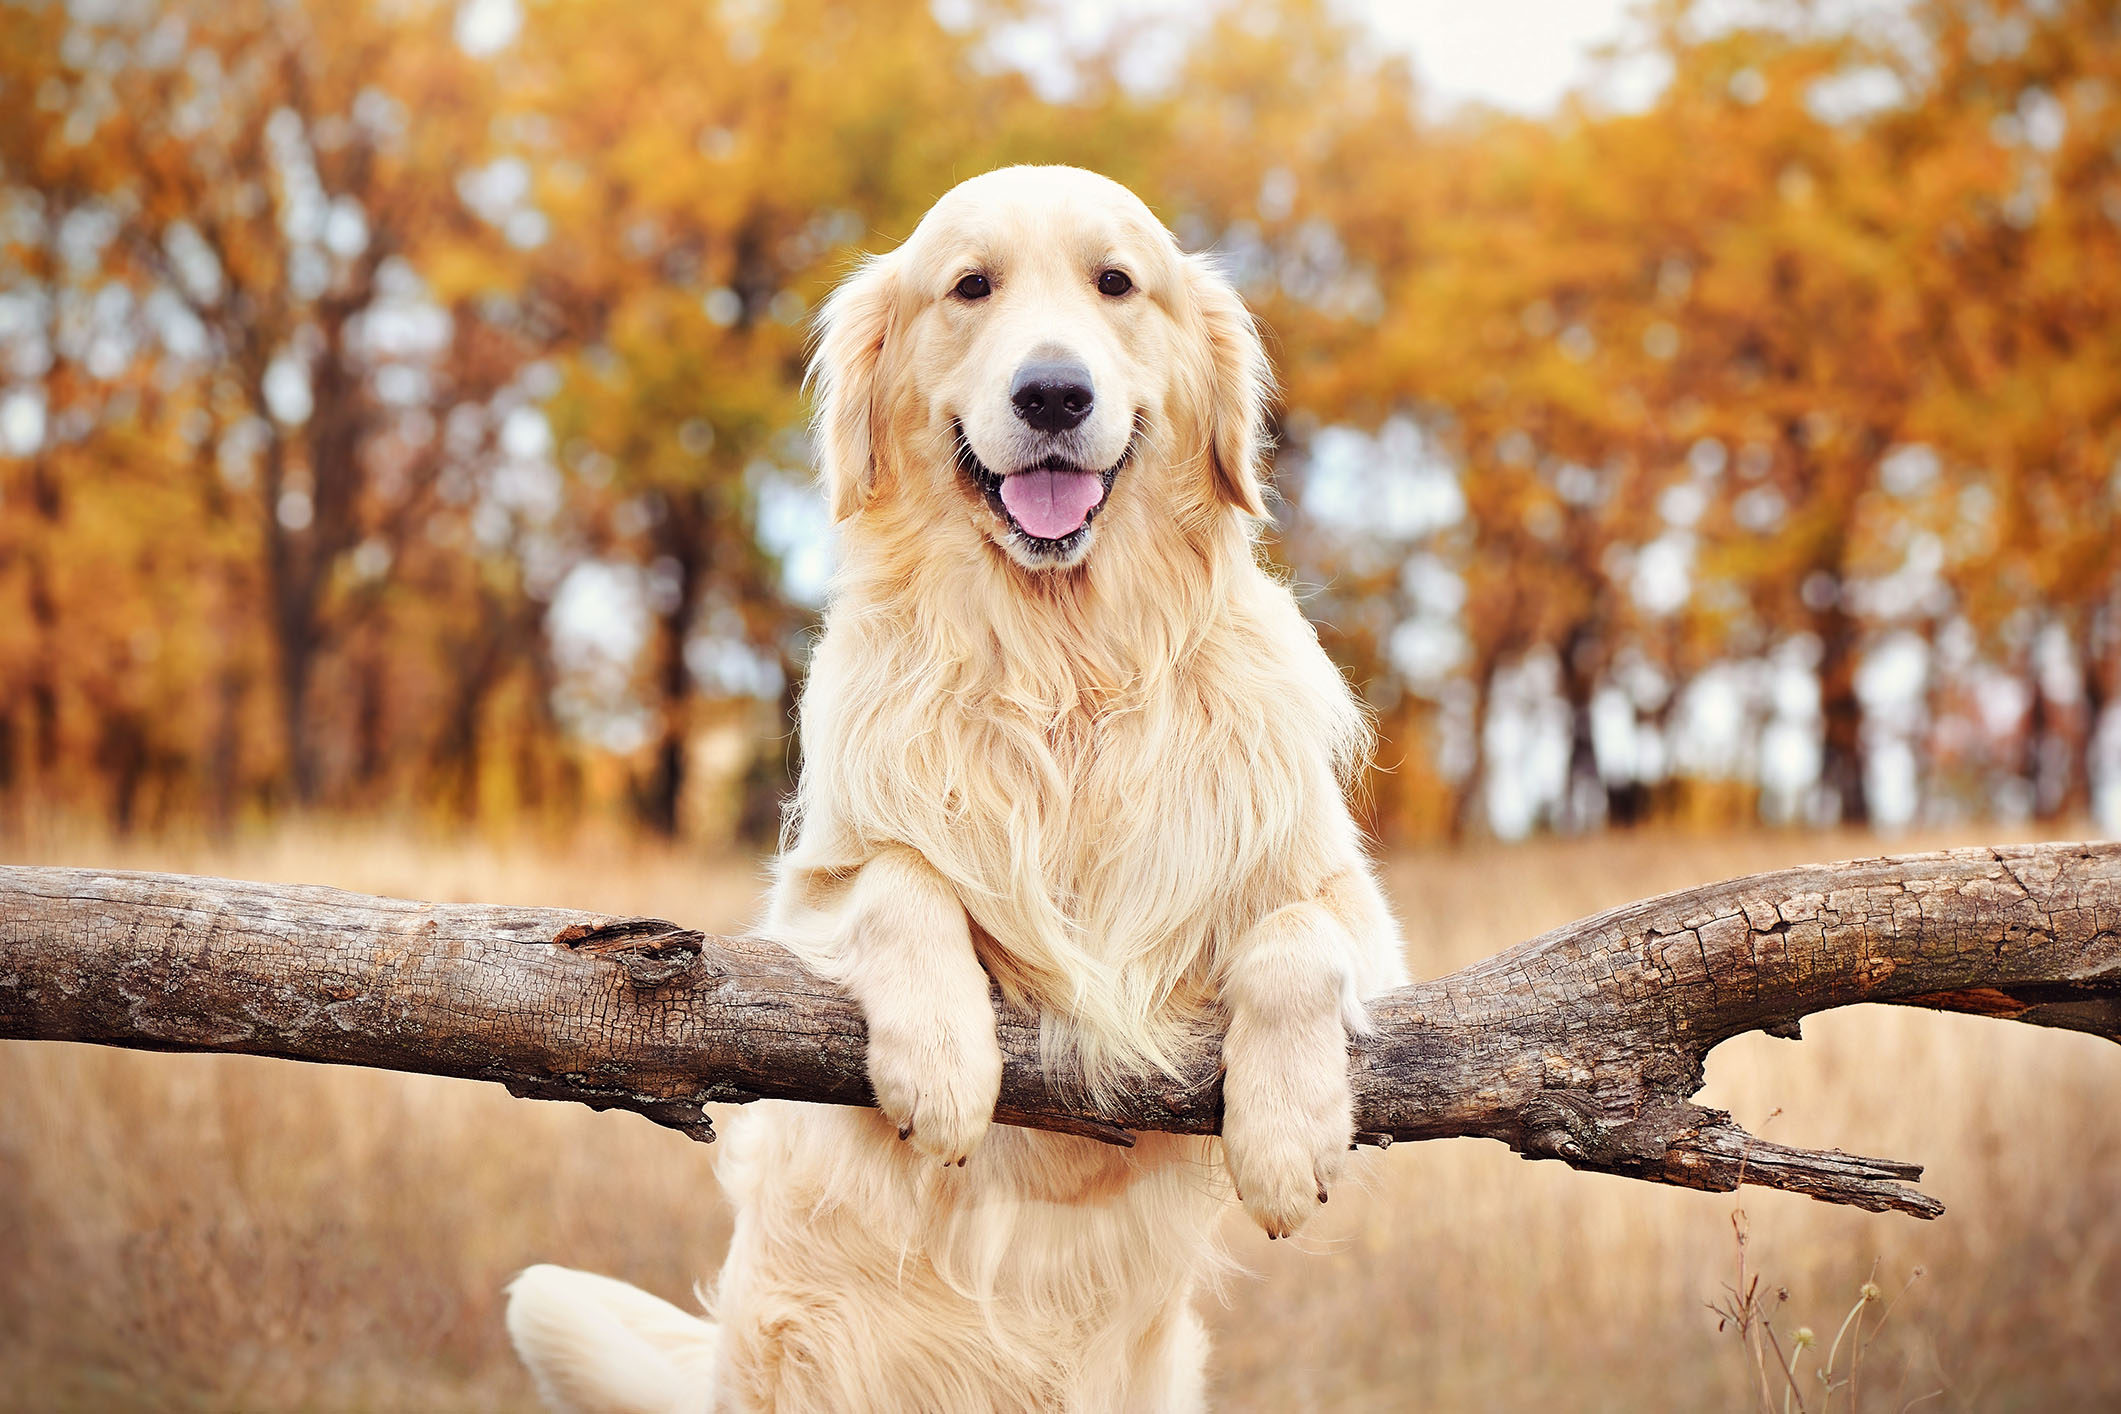

In [4]:
# 이미지/텍스트 전처리
image_path = './Golden-Retriever.jpg'
image = Image.open(image_path).convert('RGB')
image

In [6]:
question = 'What is the dog doing?'
inputs = processor(images=image, text=question, return_tensors="pt")

print(inputs)

{'pixel_values': tensor([[[[ 0.3829,  0.3683,  0.3537,  ...,  0.1201,  0.1055,  0.2223],
          [ 0.4997,  0.4413,  0.4121,  ...,  0.1201,  0.1055,  0.2077],
          [ 0.5581,  0.4705,  0.4413,  ...,  0.0909,  0.0909,  0.2077],
          ...,
          [ 0.0325,  0.0033,  0.0179,  ..., -0.2302, -0.2740, -0.2740],
          [-0.0113, -0.0405, -0.0405,  ..., -0.2156, -0.2594, -0.2740],
          [-0.0550, -0.0842, -0.0988,  ..., -0.2010, -0.2448, -0.2886]],

         [[-0.0712,  0.0338,  0.0488,  ..., -0.6265, -0.6115, -0.4464],
          [-0.1463, -0.0562, -0.0412,  ..., -0.6415, -0.5815, -0.4164],
          [-0.2213, -0.2063, -0.1913,  ..., -0.6565, -0.5515, -0.4164],
          ...,
          [-0.3414, -0.3564, -0.3864,  ..., -0.6265, -0.6865, -0.6865],
          [-0.3864, -0.4164, -0.4464,  ..., -0.6115, -0.6565, -0.6865],
          [-0.4314, -0.4464, -0.4914,  ..., -0.5815, -0.6415, -0.6865]],

         [[-0.5417, -0.3284, -0.3000,  ..., -1.2243, -1.1674, -0.9683],
          [-0

In [ ]:
print(inputs['pixel_values'].shape) # original image 크기가 processor에서 384x384로 변환되어 입력됨 (Resize적용)

torch.Size([1, 3, 384, 384])


In [11]:
# 답변 생성
import torch

with torch.no_grad(): # 입력된 데이터를 갖고 연산 수행 → 모델 파라미터 업데이트 없음(학습x) 모델이 추론하는 과정만 진행
    outputs = model.generate(
        **inputs,        # inputs_ids, attention_mask, pixel_values 파라미터 전달
        max_length=30,   # 최대 답변 길이
        num_beams=3      # beam search 파라미터 : 모델 출력 품질 조절, 답변을 생성할 때 beam_search 토큰 후보군을 3개 운영
    )

print(outputs)
answer = processor.decode(outputs[0], skip_special_tokens=True)
print("Question: ", question)
print("Answer: ", answer)

tensor([[30522,  3564,  2006,  8833,   102]])
Question:  What is the dog doing?
Answer:  sitting on log
